<a href="https://colab.research.google.com/github/cstepper/RDCOMClient/blob/master/pysplitline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python: Split Lines at Percent

## Aim

We have a dataset of linestrings, which we need to get only parts (from a defined directions) based on percentage values

## Analysis

Install and load required packages

In [ ]:
# @title CODE: Install libraries
!pip install \
geopandas \
pyshp \
shapely \
folium \
matplotlib \
mapclassify \
--upgrade --quiet


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 38.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.1/59.1 kB 4.4 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.8.0
    Uninstalling matplotlib-3.8.0:
      Successfully uninstalled matplotlib-3.8.0


In [ ]:
# @title CODE: Import libraries

import numpy as np  # Library that provides functions for mathematical operations and handling arrays
import pandas as pd  # Library that provides a data frame class and functions to manipulate data frames
import geopandas as gpd  # Library that helps working with spatial data

from shapely.geometry import LineString
from shapely.ops import split
from shapely.geometry import Point

### Data

We create a dummy dataset:

In [ ]:
# @title CODE: Dummy dataset

# Create LineString geometries in Bavaria (EPSG:25832)
geom = [LineString([(691000, 5332000), (691500, 5332500), (692000, 5333000)]),
LineString([(692000, 5333000), (692500, 5333500), (693000, 5334000)]),
LineString([(693000, 5334000), (693500, 5334500), (694000, 5335000)])
]

# Create a GeoDataFrame
gdf = gpd.GeoDataFrame(
    {
        'id': [1, 2, 3],
        'name': ['a', 'b', 'c'],
        'direction': [True, True, False],
        'fraction': [.1, .5, .7],
        },
    geometry=geom,
    crs="EPSG:25832"
)

# Display the GeoDataFrame
gdf

,id,name,direction,fraction,geometry
0,1,a,True,0.1,"LINESTRING (691000 5332000, 691500 5332500, 69..."
1,2,b,True,0.5,"LINESTRING (692000 5333000, 692500 5333500, 69..."
2,3,c,False,0.7,"LINESTRING (693000 5334000, 693500 5334500, 69..."


Next, we must define the function

In [ ]:
# @title CODE: Define function
def split_line(line, direction, fraction):
  if not direction:
    line = line.reverse()

  # calculate split distance
  split_distance = line.length * fraction
  midpoint = line.interpolate(split_distance)

  # split line
  split_geom = split(line, midpoint)

  # subset first geom
  list(split_geom.geoms)[0]
  # calculate split distance
  split_distance = line.length * fraction
  midpoint = line.interpolate(split_distance)

  # split line
  return split_geom = split(line, Point(midpoint))

  # subset first geom
  return list(split_geom.geoms)[0]


SyntaxError: invalid syntax (<ipython-input-95-121b8e33fb6b>, line 20)

Apply function

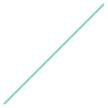

In [ ]:
line = gdf.geometry[0]
direction = gdf.direction[0]
fraction = gdf.fraction[0]

res = split_line(line, direction, fraction)
res

In [ ]:
gdf.geometry.get_coordinates()

,x,y
0,691000.0,5332000.0
0,691500.0,5332500.0
0,692000.0,5333000.0
1,692000.0,5333000.0
1,692500.0,5333500.0
1,693000.0,5334000.0
2,693000.0,5334000.0
2,693500.0,5334500.0
2,694000.0,5335000.0


In [ ]:
list(res.coords)

[(691000.0, 5332000.0), (691100.0, 5332100.0)]

In [ ]:
# @title CODE: Apply function
gdf['split_geometry'] = [
    split_line(geom, dir_, frac)
    for geom, dir_, frac, in zip(gdf.geometry, gdf.direction, gdf.fraction)
]


In [ ]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   id              3 non-null      int64   
 1   name            3 non-null      object  
 2   direction       3 non-null      bool    
 3   fraction        3 non-null      float64 
 4   geometry        3 non-null      geometry
 5   split_geometry  3 non-null      object  
dtypes: bool(1), float64(1), geometry(1), int64(1), object(2)
memory usage: 251.0+ bytes


In [ ]:
list(gdf["split_geometry"][0].coords)

[(691000.0, 5332000.0), (691100.0, 5332100.0)]

In [ ]:
gdf.geometry.name

'geometry'

In [ ]:
gdf.geometry.crs

<Projected CRS: EPSG:25832>
Name: ETRS89 / UTM zone 32N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Europe between 6°E and 12°E: Austria; Belgium; Denmark - onshore and offshore; Germany - onshore and offshore; Norway including - onshore and offshore; Spain - offshore.
- bounds: (6.0, 38.76, 12.01, 84.33)
Coordinate Operation:
- name: UTM zone 32N
- method: Transverse Mercator
Datum: European Terrestrial Reference System 1989 ensemble
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [ ]:
# set geometry to new column
# Assume `gdf` has a new geometry column 'split_geometry' and you want to set it as the active one
gdf = gdf.set_geometry('split_geometry')

# Explicitly set the CRS (same as the original one, if applicable)
gdf = gdf.set_crs(gdf["geometry"].crs, allow_override=True)

# Verify the CRS and active geometry
print(f"Active geometry column: {gdf.geometry.name}")
print(f"CRS: {gdf.crs}")


Active geometry column: split_geometry
CRS: EPSG:25832


In [ ]:
gdf

,id,name,direction,fraction,geometry,split_geometry
0,1,a,True,0.1,"LINESTRING (691000 5332000, 691500 5332500, 69...","LINESTRING (691000 5332000, 691100 5332100)"
1,2,b,True,0.5,"LINESTRING (692000 5333000, 692500 5333500, 69...","LINESTRING (692000 5333000, 692500 5333500)"
2,3,c,False,0.7,"LINESTRING (693000 5334000, 693500 5334500, 69...","LINESTRING (694000 5335000, 693500 5334500, 69..."


In [ ]:
gdf.get_coordinates()

,x,y
0,691000.0,5332000.0
0,691100.0,5332100.0
1,692000.0,5333000.0
1,692500.0,5333500.0
2,694000.0,5335000.0
2,693500.0,5334500.0
2,693300.0,5334300.0


In [ ]:
gdf.geometry.name

'split_geometry'

In [ ]:
gdf.bounds

,minx,miny,maxx,maxy
0,691000.0,5332000.0,691100.0,5332100.0
1,692000.0,5333000.0,692500.0,5333500.0
2,693300.0,5334300.0,694000.0,5335000.0


In [ ]:
import folium

# Create the base map
m = folium.Map(location=[48.1351, 11.5820], zoom_start=13)  # Center at desired location

# Add the first geometry column
gdf.set_geometry("geometry").explore(column=None, color="orange", m=m)

# Add the second geometry column
gdf.set_geometry('split_geometry').explore(column=None, color="blue", m=m)

# Show the map
m